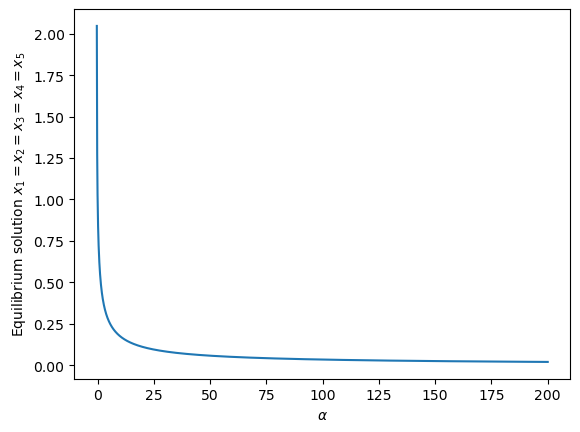

In [104]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve


N = 2500


# Set up the values of alpha that we want to consider: [-1, 10]
alpha = np.linspace(-0.35,200,N)

equil = np.zeros(N)
i_equil = []
alpha_equil = []


for i in range(N):
    f  = lambda x: np.exp(-alpha[i]*x) -x;
    # fp = lambda a, x3: -a*np.exp(-a*3) - 1;
    sol = fsolve(f, 1, full_output="TRUE")  
                # full_output makes the function fsolve return other details about the outcome of the method
                # such as whether or not the method converged, which is stored in the third component sol[2]
    if (sol[2]==1): # If fsolve found a solution 
        equil[i] = sol[0][0]
        i_equil.append(i)
        alpha_equil.append(alpha[i])
        
    else : # If fsolve couldn't find an equilibrium
        equil[i] = 'NaN'
        

plt.plot(alpha,equil)
plt.xlabel(r"$\alpha$");
plt.ylabel(r"Equilibrium solution $x_1=x_2=x_3=x_4=x_5$");

/tmp/ipykernel_826/3055505724.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i], Evec = np.linalg.eig(J(i_equil[i]));
/tmp/ipykernel_826/3055505724.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i], Evec = np.linalg.eig(J(i_equil[i]));


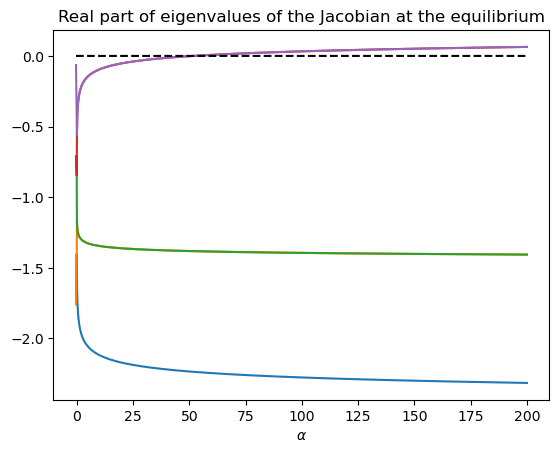

In [105]:
# Construct the Jacobian at the equilibrium for each alpha
#
# J(i) gives the Jacobian matrix for alpha[i] and its corresponding equilibrium

J = lambda i: np.array([[-1, 0,0,0, -alpha[i]*np.exp(-alpha[i]*equil[i])],[1,-1,0,0,0],[0,1,-1,0,0],[0,0,1,-1,0],[0,0,0,1,-1]]);

# Create the array that is going to store the real part of the eigenvalues of the Jacobian
N_eq = len(i_equil)
eig = np.zeros([N_eq,5])


# Calculate the eigenvalues of the Jacobian
for i in range(N_eq):
    eig[i], Evec = np.linalg.eig(J(i_equil[i]));
    eig[i].sort()

# Plot the eigenvalues of the Jacobian
plt.plot(alpha_equil, eig[:,0], alpha_equil, eig[:,1], alpha_equil, eig[:,2], alpha_equil, eig[:,3], alpha_equil, eig[:,4])
plt.plot(alpha_equil, np.zeros(N_eq),'--k')
plt.xlabel(r"$\alpha$");
plt.title('Real part of eigenvalues of the Jacobian at the equilibrium');
#plt.yticks(np.arange(-2.5, 0.1, 0.5));
# plt.legend(["Real Eigenvalues", "Real part of complex eigenvalues"]);

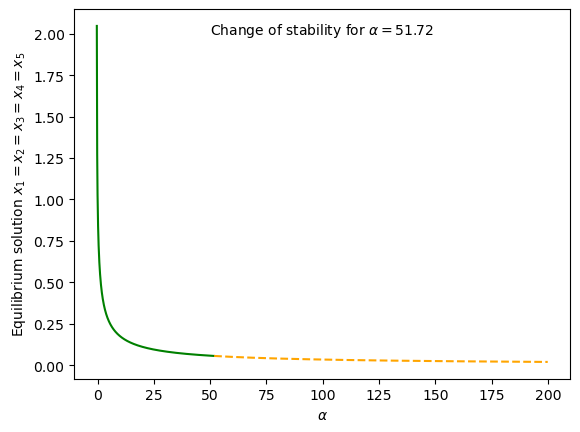

In [106]:
# Check when the highest eigenvalue eig[:,4] (because they were sorted) turns from negative to positive

for i in range(N_eq-1):
    if (eig[i,4]*eig[i+1,4]<0):
        i_star = i
        alpha_star=(alpha_equil[i]+alpha_equil[i+1])/2

# Plot the equilibrium solution:
#   * green = all eigenvalues are negative => stable
#   * orange = at least one eigenvalue is positive => unstable

plt.plot(alpha_equil[0:i_star],equil[0:i_star],'g')
plt.plot(alpha_equil[i_star+1:N_eq-1],equil[i_star+1:N_eq-1],'--',color='orange')
plt.xlabel(r"$\alpha$");
plt.ylabel(r"Equilibrium solution $x_1=x_2=x_3=x_4=x_5$");
plt.text(50,2,r"Change of stability for $\alpha=$%s"%round(alpha_star,2));

# plt.savefig("circadian5.png")



Why in this case, we are actually looking for the **unstable** case.

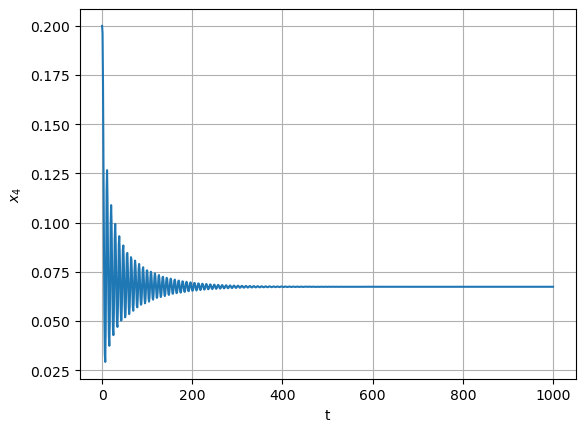

In [135]:
from scipy.integrate import odeint

alpha=40

def ODE_rhs(x, t):
    return [-x[0]+np.exp(-alpha*x[4]), -x[1]+x[0], -x[2]+x[1], -x[3]+x[2], -x[4]+x[3]];


tN = 1000
t = np.linspace(0,1000,tN)


x5_init = 0.2

x_init = x5_init*np.ones(5);

sol = odeint(ODE_rhs, x_init, t)

# for i in range(5):
#     plt.plot(t, sol[:, i]);
# plt.legend(['$x_1$','$x_2$','$x_3$','$x_4$','$x_5$'])
plt.plot(t, sol[:, 3]);  # python starts with index 0, so sol[:,3] = x4
plt.ylabel('$x_4$')
plt.xlabel('t');
plt.grid();
plt.show();




In [136]:
tN = 1000
t = np.linspace(0,1000,tN)

x4_init = 0.05


periodic=np.zeros([2,N_eq])

for i in range(N_eq):
    ODE_a_rhs = lambda x,t: [-x[0]+np.exp(-alpha_equil[i]*x[4]), -x[1]+x[0], -x[2]+x[1], -x[3]+x[2], -x[4]+x[3]];

    sol = odeint(ODE_a_rhs, x_init, t)
    periodic[0,i] = min(sol[-200:-1,3])
    periodic[1,i] = max(sol[-200:-1,3])

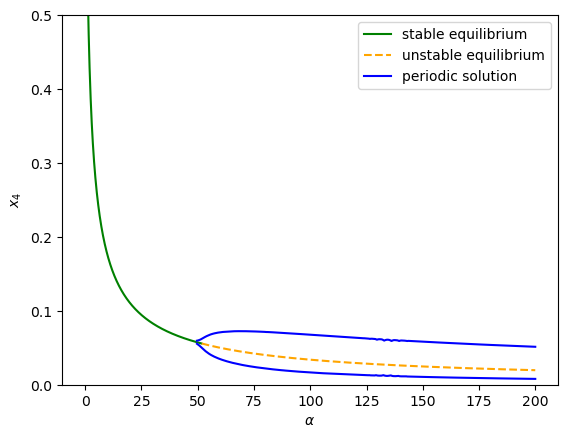

In [138]:
plt.plot(alpha_equil[0:i_star],equil[0:i_star],'g')
plt.plot(alpha_equil[i_star+1:N_eq-1],equil[i_star+1:N_eq-1],'--',color='orange')
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$x_4$');
plt.ylim([0,0.5]);
# plt.text(50,2,r"Change of stability for $\alpha=$%s"%round(alpha_star,2));
plt.plot(alpha_equil[i_star-25:N_eq-1], periodic[0,i_star-25:N_eq-1],'b')
plt.plot(alpha_equil[i_star-25:N_eq-1], periodic[1,i_star-25:N_eq-1],'b')
plt.legend(['stable equilibrium', 'unstable equilibrium', 'periodic solution']);
# plt.yscale('log')
# plt.ylim([0.007,1]);
